# 10강
- 데이터셋 로드

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_x = np.arange(1000).astype(np.float32).reshape(-1, 1) 
train_y = 3*train_x + 1 

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y)) # numpy, list -> tensorflow dataset object
train_ds = train_ds.shuffle(100).batch(32) # shuffle, batch등을 더 원활하게 쓸수 있음
print(train_ds)

for x, y in train_ds:
  print(x.shape, y.shape, '\n')

<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>
(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(8, 1) (8, 1) 



In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.data import Dataset
import sys

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# print(type(train_images))
# print(train_images.shape)
# print(train_labels.shape)
# print(test_images.shape)
# print(test_labels.shape)

sys.getsizeof(train_images)/1024/1024  

44.8609619140625

(9, 28, 28)
(9,)


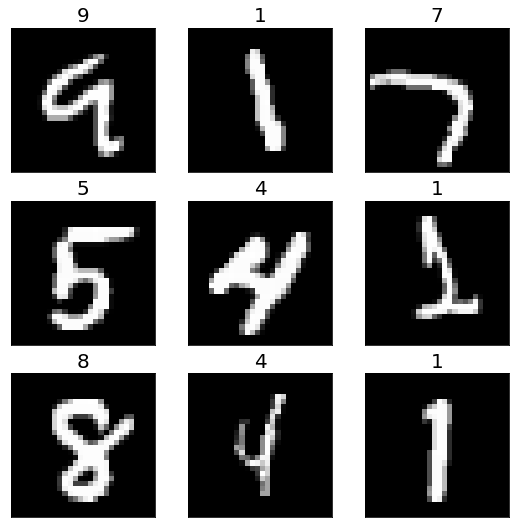

In [17]:
train_ds = Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(9)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
print(images.shape) # batch 1개(9개의 image)만큼을 가져옴
print(labels.shape) 

fig, axes = plt.subplots(3, 3, figsize = (9, 9))

for ax_idx, ax in enumerate(axes.flat):
  image = images[ax_idx, ...]
  label = labels[ax_idx]

  ax.imshow(image.numpy(), 'gray')
  ax.set_title(label.numpy(), fontsize=20)

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# 11강
- 데이터로드(텐서플로우에서 제공)

In [25]:
import tensorflow_datasets as tfds

datatset, ds_info = tfds.load(name = 'mnist', 
                              shuffle_files=True,
                              with_info = True) # 데이터셋에 대한 정보(ds_info) 추가
print(ds_info.features)
print(ds_info.splits)

print(ds_info.splits['train'].num_examples)
print(ds_info.splits['test'].num_examples)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
{'test': <tfds.core.SplitInfo num_examples=10000>, 'train': <tfds.core.SplitInfo num_examples=60000>}
60000
10000


In [29]:
dataset = tfds.load(name = 'mnist', 
                    shuffle_files=True)

# print(dataset.keys(), '\n')
# print(dataset.values())

train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

EPOCHS = 10

for epoch in range(EOPOCHS):
  for data in train_ds:
    images = data['image']
    labels = data['label']

for tmp in train_ds:
  print(type(tmp))

  print(tmp.keys())
  images = tmp['image']
  labels = tmp['label']

  print(images.shape)
  print(labels.shape)
  break

<class 'dict'>
dict_keys(['image', 'label'])
(32, 28, 28, 1)
(32,)


In [33]:
dataset = tfds.load(name = 'mnist', 
                    shuffle_files=True,
                    as_supervised=True)

train_ds = dataset['train'].batch(32)
test_ds = dataset['test']

for tmp in train_ds:
  images = tmp[0]
  labels = tmp[1]

  print(images.shape)
  print(labels.shape)
  break

(32, 28, 28, 1)
(32,)


In [35]:
(train_ds, test_ds), ds_info = tfds.load(name = 'mnist', 
                    shuffle_files=True,
                    as_supervised=True,
                    split = ['train', 'test'],
                    with_info=True)

train_ds = train_ds.batch(32)

for tmp in train_ds:
  images = tmp[0]
  labels = tmp[1]

  print(images.shape)
  print(labels.shape)
  break

(32, 28, 28, 1)
(32,)


FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
}) 

{'test': <tfds.core.SplitInfo num_examples=32768>, 'train': <tfds.core.SplitInfo num_examples=262144>, 'validation': <tfds.core.SplitInfo num_examples=32768>}
(9, 96, 96, 3)


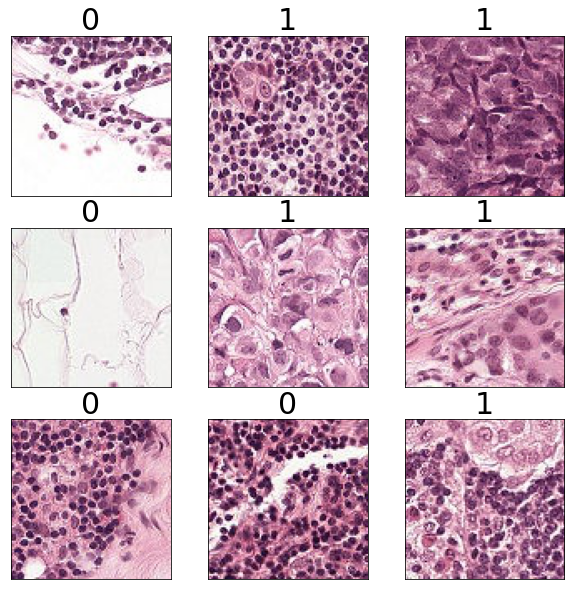

In [41]:
(train_ds, validation_ds, test_ds), ds_info = tfds.load(name = 'patch_camelyon', 
                    shuffle_files=True,
                    as_supervised=True,
                    split = ['train', 'validation', 'test'],
                    with_info=True,
                    batch_size=9)
# train_ds = train_ds.batch(9)

print(ds_info.features, '\n')
print(ds_info.splits)

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)
images = images.numpy()
labels = labels.numpy()


print(images.shape)

fig, axes = plt.subplots(3, 3, figsize = (10, 10))

for ax_idx, ax in enumerate(axes.flat):
  ax.imshow(images[ax_idx, ...])
  ax.set_title(labels[ax_idx], fontsize = 30)

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


# 12강
- Dataset Split

In [55]:
train_x = np.arange(100).reshape(-1, 1)
train_y = 3*train_x + 1

train_validation_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

# tmp_ds = train_ds.take(10)
# 
# for x, y in tmp_ds:
#   print(x)
#   print(y, '\n')

n_train_validation = 100
train_ratio = 0.8
n_train = int(n_train_validation * train_ratio)
print(n_train)
train_ds = train_validation_ds.take(n_train) # take(n) : n개만큼 데이터를 가져온다, 이를 통해 split이 가능해짐
print(train_ds)

# take와 반대 : skip
train_validation_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))

remaining_ds = train_validation_ds.skip(10)

tmp_ds = remaining_ds.take(10)
validation_ds = remaining_ds.skip(n_train)
print(validation_ds)

80
<TakeDataset shapes: ((1,), (1,)), types: (tf.int64, tf.int64)>
<SkipDataset shapes: ((1,), (1,)), types: (tf.int64, tf.int64)>
